In [1]:
%cd C:\Users\debie\Documents\kaggle

C:\Users\debie\Documents\kaggle


# Predicting diamond's price

In this project, we'll try to predict the price of diamonds by their cut, color, clarity, price, and other attributes.
To do that, we have a database of more than 50 000 diamonds, their features and their price.

The columns of the database is as followed:

-price price in US dollars 

-carat weight of the diamond 

-cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

-color diamond colour, from J (worst) to D (best)

-clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

-x length in mm

-y width in mm 

-z depth in mm 

-depth total depth percentage = z / mean(x, y) = 2 * z / (x + y)

-table width of top of diamond relative to widest point

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
diamonds = pd.read_csv('diamonds.csv')

In [4]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
col_name = {'Unnamed: 0' : 'ID'}
diamonds.rename(mapper = col_name, axis = 1, inplace = True)
diamonds.drop('ID', axis = 1, inplace = True)

In [6]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2180e309d60>,
 'caps': [<matplotlib.lines.Line2D at 0x2180e322400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2180e309910>],
 'medians': [<matplotlib.lines.Line2D at 0x2180e322b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2180e322eb0>],
 'means': []}

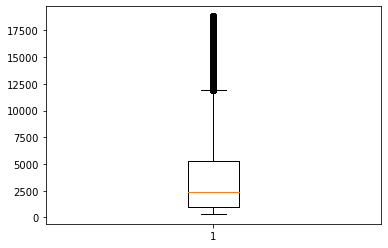

In [9]:
plt.boxplot(diamonds['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2180eb041c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2180eb047c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2180eaf6df0>],
 'medians': [<matplotlib.lines.Line2D at 0x2180eb04ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2180eb112b0>],
 'means': []}

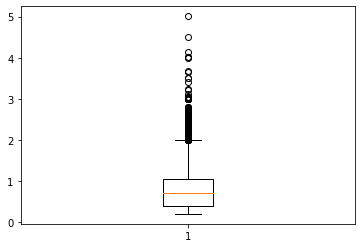

In [10]:
plt.boxplot(diamonds['carat'])

Let's remove the rows with outlier values in the price and carat columns.

In [11]:
def remove_outlier(df, column):
    quart_1 = df[column].quantile(0.25)
    quart_3 = df[column].quantile(0.75)
    inter_quart_rng = quart_3 - quart_1
    return df[(df[column] <= quart_3 + 1.5 * inter_quart_rng) & (df[column] >= quart_1 - 1.5 * inter_quart_rng)]

In [12]:
diamonds = remove_outlier(diamonds, 'price')
diamonds = remove_outlier(diamonds, 'carat')

In [13]:
from sklearn.preprocessing import OrdinalEncoder

categorical_feats = ['cut', 'color', 'clarity']

encoder = OrdinalEncoder()
diamonds[categorical_feats] = encoder.fit_transform(diamonds[categorical_feats])
diamonds[categorical_feats].head()

,cut,color,clarity
0,2.0,1.0,3.0
1,3.0,1.0,2.0
2,1.0,1.0,4.0
3,3.0,5.0,5.0
4,1.0,6.0,3.0


In [14]:
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000
mean,0.715756,2.549313,2.536743,3.858018,61.749903,57.417129,3122.587322,5.568415,5.572035,3.439029
std,0.369533,1.026135,1.685555,1.732636,1.417246,2.226349,2724.401592,0.978111,0.978031,0.619484
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,2.000000,1.000000,2.000000,61.100000,56.000000,907.000000,4.660000,4.680000,2.870000
50%,0.660000,2.000000,3.000000,4.000000,61.800000,57.000000,2131.000000,5.560000,5.560000,3.410000
75%,1.010000,3.000000,4.000000,5.000000,62.500000,59.000000,4624.500000,6.420000,6.415000,3.980000
max,1.950000,4.000000,6.000000,7.000000,79.000000,79.000000,11883.000000,8.160000,31.800000,31.800000


The minimum value for x, y and z is 0 which should not be possible. Let's remove the rows with 0 in eitheir of those columns.

In [15]:
diamonds = diamonds.drop(diamonds[diamonds['x']==0].index)
diamonds = diamonds.drop(diamonds[diamonds['y']==0].index)
diamonds = diamonds.drop(diamonds[diamonds['z']==0].index)

In [16]:
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,50107.000000,50107.000000,50107.000000,50107.000000,50107.000000,50107.000000,50107.000000,50107.000000,50107.000000,50107.000000
mean,0.715678,2.549404,2.536672,3.858303,61.750051,57.416770,3122.392081,5.568812,5.572308,3.439852
std,0.369530,1.026088,1.685717,1.732546,1.416899,2.225935,2724.618137,0.976549,0.976783,0.617268
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.380000,2.000000,1.000000,2.000000,61.100000,56.000000,907.000000,4.660000,4.680000,2.870000
50%,0.660000,2.000000,3.000000,4.000000,61.800000,57.000000,2131.000000,5.560000,5.550000,3.410000
75%,1.010000,3.000000,4.000000,5.000000,62.500000,59.000000,4624.000000,6.420000,6.410000,3.980000
max,1.950000,4.000000,6.000000,7.000000,79.000000,79.000000,11883.000000,8.160000,31.800000,31.800000


In [17]:
import seaborn as sns

We now plot a correlation map.

<AxesSubplot:>

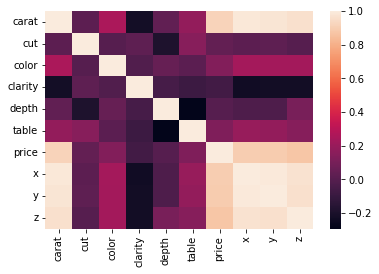

In [18]:
sns.heatmap(diamonds.corr())

In [19]:
diamonds[['x','y','z','carat']].corr()

,x,y,z,carat
x,1.000000,0.990853,0.967686,0.985589
y,0.990853,1.000000,0.961824,0.977203
z,0.967686,0.961824,1.000000,0.962117
carat,0.985589,0.977203,0.962117,1.000000


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

We divide the dataset into 2 different one, one for training the algorithm (train, with 80 % of the rows) and one for testing its accuracy (test, with 20 % of the rows).

In [21]:
train ,test = train_test_split(diamonds,test_size = 0.2,random_state = 15 )

In [22]:
columns = list(train.columns)
columns.remove('price')

We write a function that will take the estimator, the training and testing set as an input and output accuracy metrics with the train and test dataset.

In [23]:
def modeling(estimator, train, test):
    train_predictions = estimator.predict(train[columns])
    test_predictions = estimator.predict(test[columns])

    train_mse = mean_squared_error(train_predictions, train['price'])
    test_mse = mean_squared_error(test_predictions, test['price'])

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_mae = mean_absolute_error(train_predictions, train['price'])
    test_mae = mean_absolute_error(test_predictions, test['price'])

    train_r2 = r2_score(train_predictions, train['price'])
    test_r2 = r2_score(test_predictions, test['price'])

    print([train_rmse, train_mae, train_r2])
    print([test_rmse, test_mae, test_r2])

In [24]:
lr = LinearRegression()
lr.fit(train[columns], train['price'])

modeling(lr,train,test)

[915.8935057365966, 614.5574499885623, 0.872080502793495]
[965.9496631719579, 623.5773880644399, 0.8630424762432158]


With the linear regression algorithm we got a R2 score of 0.863 out of 1 for the testing set.
It can be improved.

In [25]:
rf = RandomForestRegressor(n_estimators = 30, max_features = 8)
rf.fit(train[columns], train['price'])

modeling(rf,train,test)

[146.21074881402689, 78.30812068171272, 0.9970779880468039]
[386.65806712050136, 209.67711365683328, 0.9797630639017485]


With the random forest regression algorithm we got a R2 score of 0.98 out of 1 for the testing set. It is quite good.

Let's continue to use this algorithm as it has shown good results, but let's now search for better parameters to use with it:

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [5,10,25,50], 'max_features':[8,10,15,20]},
              {'bootstrap':[False], 'max_features':[2,3,4],'n_estimators':[5,10,25]}
]
rfr = RandomForestRegressor(random_state = 1)

grid_search = GridSearchCV(rfr,param_grid,cv = 5,return_train_score = True)
grid_search.fit(train[columns], train['price'])

C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\debie\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\debie\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid=[{'max_features': [8, 10, 15, 20],
                          'n_estimators': [5, 10, 25, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [5, 10, 25]}],
             return_train_score=True)

In [27]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=50, random_state=1)

In [28]:
rf = RandomForestRegressor(max_features=7, n_estimators=25, random_state=1)
rf.fit(train[columns], train['price'])

modeling(rf,train,test)

[148.0094334273974, 79.28200788918785, 0.9970040273928158]
[378.74588984831894, 207.31401555150097, 0.9805752687525762]


The result we got are a little better than before: R2 score of 0.981 out of 1, this is very good. The parameters used to get this result are max_features=8, n_estimators=50.